### Importing Libraries and Early Data Exploration

In [ ]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns # for data visualization
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np


In [5]:
import numpy as np
import pandas as pd

images = np.load('/content/drive/My Drive/Python Course/images.npy')
data = pd.read_csv('/content/drive/My Drive/Python Course/Labels.csv')
df = data.copy()


In [4]:
images = np.load('/content/drive/My Drive/Python Course/images.npy')
data = pd.read_csv('/content/drive/My Drive/Python Course/Labels.csv')
df = data.copy()

NameError: ignored

In [6]:
df.shape

(4750, 1)

- 4750 images in the data

In [7]:
df.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

- 3 highest classes of images are Loose Silky-bent, Common Chickweed and Scentless Mayweed

### EDA

In [11]:
import matplotlib.pyplot as plt


In [12]:
counts = df['Label'].value_counts().values


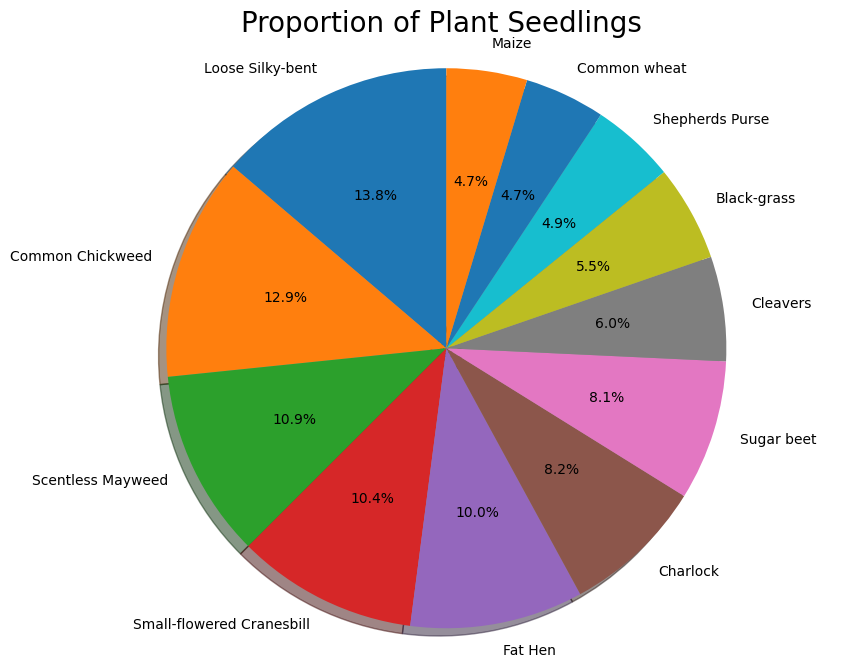

In [13]:
import matplotlib.pyplot as plt

labels = df['Label'].value_counts().index.tolist()
counts = df['Label'].value_counts().values

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(x=counts, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Plant Seedlings ", size=20)
plt.show()


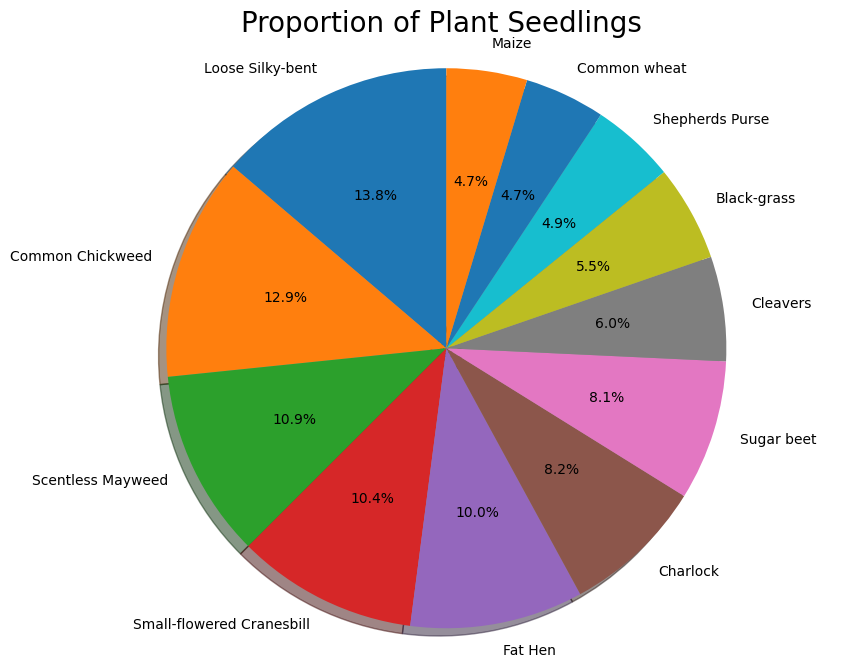

In [14]:
labels = df['Label'].value_counts().index.tolist()
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(data = df, x= df.value_counts(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Plant Seedlings ", size = 20)
plt.show()

- reinforcing top 3 and their percentages

In [15]:
df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


- peak into the data

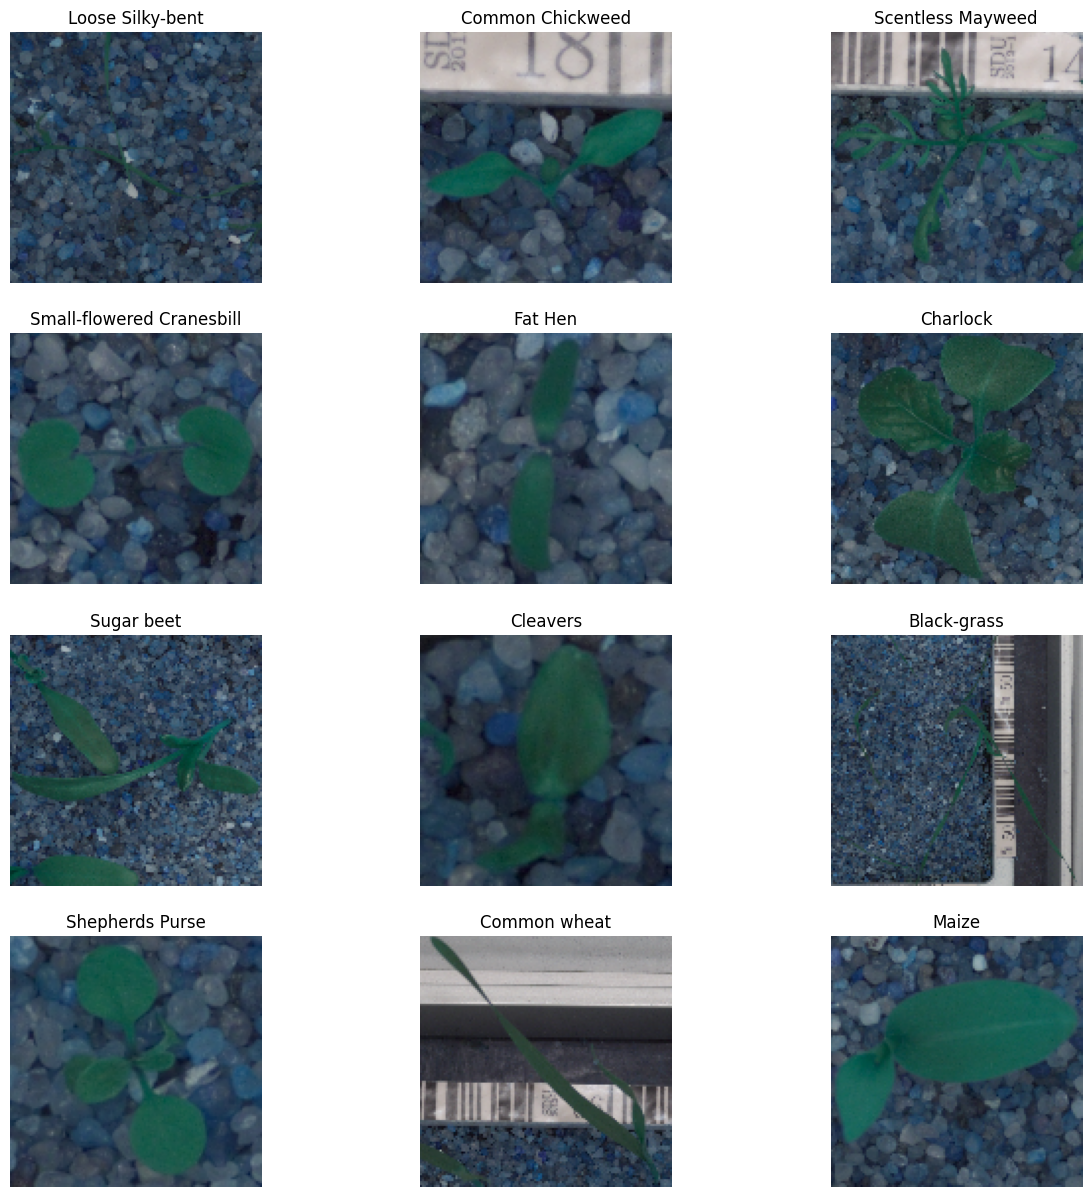

In [16]:
fig = plt.figure(figsize = (15,15))
i=0
for label in labels:
  index = df[df['Label']==label].first_valid_index();
  ax = fig.add_subplot(4, 3, i+1);
  plt.imshow(images[index], cmap='Greys_r');
  plt.title(label);
  plt.axis('off');
  i=i+1;
plt.show();

- First image in the data with each classification
- Common wheat and black greass have sticks in the shape/colour of barcodes could affect CNN gradients

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis=0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((128,128))
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

CATEGORIES = labels

# Dictionary to store data
data_dict = {
    category: [] for category in CATEGORIES
}

for img in images:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # Converting image to grayscale
    new_array = cv2.resize(gray_img, (128, 128))

    # Here, you should determine the category of the image and add to the corresponding list
    # This is a placeholder, adjust as needed
    determined_category = ... # get the category of the image somehow
    data_dict[determined_category].append([new_array])

# Calculate the mean image for each category
mean_images = {
    category: find_mean_img(np.array(data), category) for category, data in data_dict.items()
}


KeyError: ignored

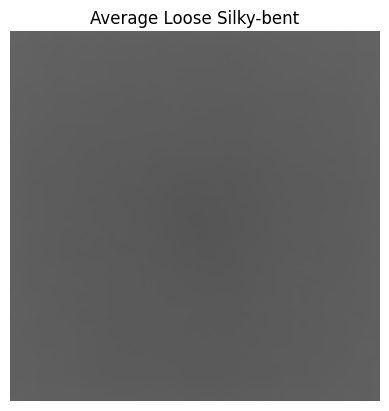

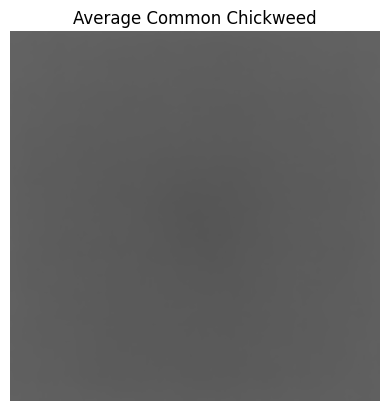

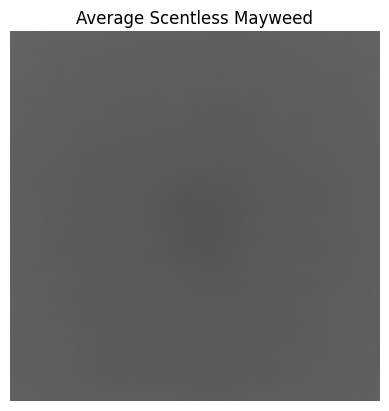

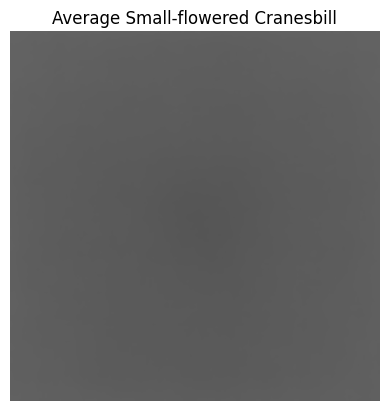

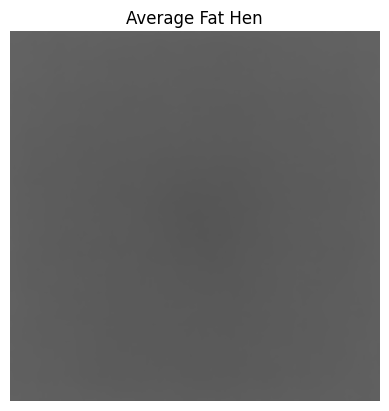

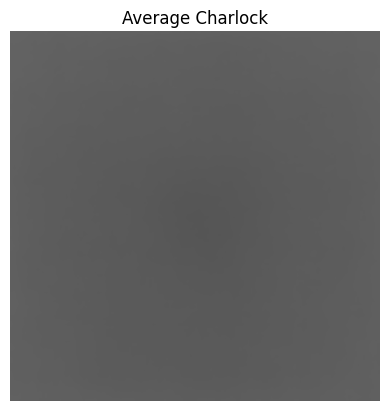

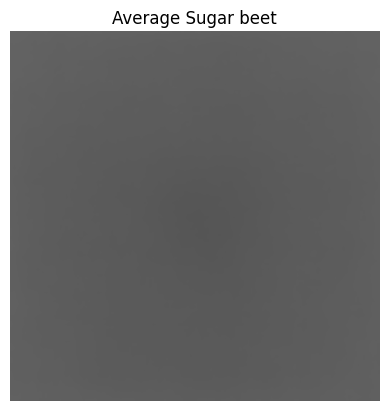

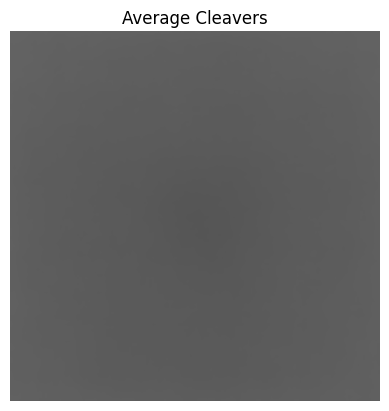

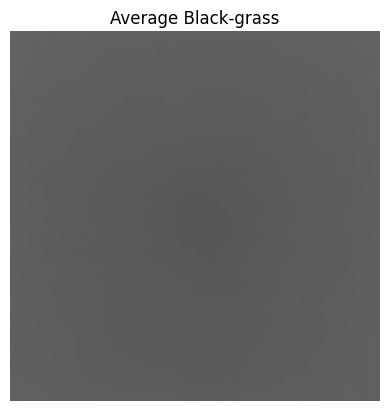

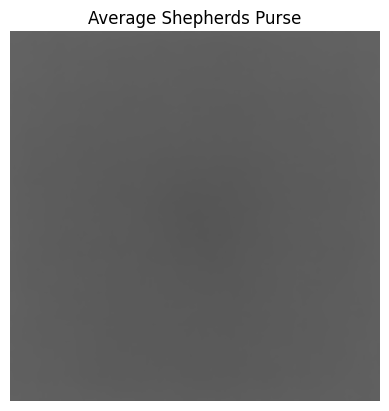

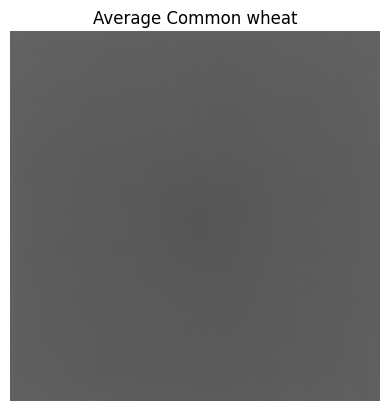

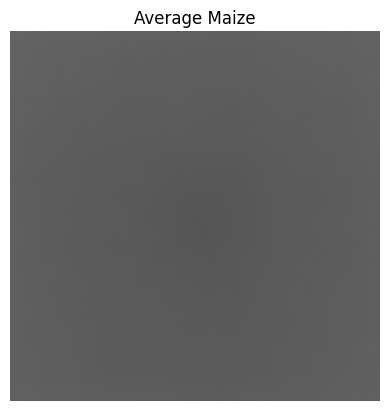

In [20]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((128,128))
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

CATEGORIES = labels
Loose_Silky_bent_data=[]
Common_Chickweed_data=[]
Scentless_Mayweed_data=[]
Small_flowered_Cranesbill_data=[]
FatHen_data=[]
Charlock_data=[]
Sugarbeet_data=[]
Cleavers_data=[]
Black_grass_data=[]
Shepherds_Purse_data=[]
Commonwheat_data=[]
Maize_data=[]

for cat in CATEGORIES:
        for img in images:
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # Converting image to greyscale to reduce the complexity and computation
                new_array = cv2.resize(gray_img, (128, 128))
                if cat==CATEGORIES[0]:
                      Loose_Silky_bent_data.append([new_array])
                if cat==CATEGORIES[1]:
                      Common_Chickweed_data.append([new_array])
                if cat==CATEGORIES[2]:
                      Scentless_Mayweed_data.append([new_array])
                if cat==CATEGORIES[3]:
                      Small_flowered_Cranesbill_data.append([new_array])
                if cat==CATEGORIES[4]:
                      FatHen_data.append([new_array])
                if cat==CATEGORIES[5]:
                      Charlock_data.append([new_array])
                if cat==CATEGORIES[6]:
                      Sugarbeet_data.append([new_array])
                if cat==CATEGORIES[7]:
                      Cleavers_data.append([new_array])
                if cat==CATEGORIES[8]:
                      Black_grass_data.append([new_array])
                if cat==CATEGORIES[9]:
                      Shepherds_Purse_data.append([new_array])
                if cat==CATEGORIES[10]:
                      Commonwheat_data.append([new_array])
                if cat==CATEGORIES[11]:
                      Maize_data.append([new_array])



Loose_Silky_bent_mean=find_mean_img(np.array(Loose_Silky_bent_data),'Loose Silky-bent')
Common_Chickweed_mean=find_mean_img(np.array(Common_Chickweed_data),'Common Chickweed')
Scentless_Mayweed_mean=find_mean_img(np.array(Scentless_Mayweed_data),'Scentless Mayweed')
Small_flowered_Cranesbill_mean=find_mean_img(np.array(Small_flowered_Cranesbill_data),'Small-flowered Cranesbill')
FatHen_mean=find_mean_img(np.array(FatHen_data),'Fat Hen')
Charlock_mean=find_mean_img(np.array(Charlock_data),'Charlock')
Sugarbeet_mean=find_mean_img(np.array(Sugarbeet_data),'Sugar beet')
Cleavers_mean=find_mean_img(np.array(Cleavers_data),'Cleavers')
Black_grass_mean=find_mean_img(np.array(Black_grass_data),'Black-grass')
Shepherds_Purse_mean=find_mean_img(np.array(Shepherds_Purse_data),'Shepherds Purse')
Common_wheat_mean=find_mean_img(np.array(Commonwheat_data),'Common wheat')
Maize_mean=find_mean_img(np.array(Maize_data),'Maize')

- All mean images came out in various shades of gray

### Grayscale and Gaussian Blurring Preprocessing

In [21]:
for img in images:
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # Converting image to greyscale to reduce the complexity and computation
  images_grayscale = cv2.resize(gray_img, (28, 28))

- Turning images into grayscale

In [22]:
images_blur_scale = np.empty((4750,28,28))

In [23]:
for idx, img in enumerate(images_grayscale):
  images_blur_scale[idx] = cv2.GaussianBlur(img, (5, 5), 0)

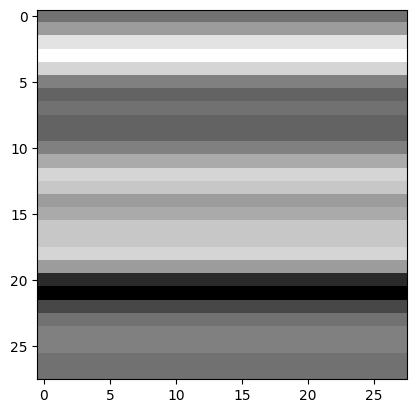

In [24]:
plt.imshow(images_blur_scale[1], cmap='gray')

- example of gaussian blurring applied to grayscale image

### Train Test Split

In [25]:
x = np.array(images_blur_scale)
y = df["Label"]

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [29]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train = X_train /255
X_test = X_test /255

- Normalization of X calues

In [31]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)  # fit on training data and transform it
y_test = lb.transform(y_test)        # only transform the test data using the same fit


- Using alternative encoding for y variable

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3325, 28, 28, 1)
(1425, 28, 28, 1)
(3325, 12)
(1425, 12)


- Train and test shapes for X and Y variables

### Model Building - Model 1

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


In [36]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))


In [37]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
history = model.fit( x=X_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)

Epoch 1/10
73/73 [==============================] - 13s 12ms/step - loss: 2.4413 - accuracy: 0.1242 - val_loss: 2.3994 - val_accuracy: 0.1483
Epoch 2/10
73/73 [==============================] - 0s 6ms/step - loss: 2.4082 - accuracy: 0.1470 - val_loss: 2.3974 - val_accuracy: 0.1483
Epoch 3/10
73/73 [==============================] - 0s 6ms/step - loss: 2.4079 - accuracy: 0.1410 - val_loss: 2.3968 - val_accuracy: 0.1483
Epoch 4/10
73/73 [==============================] - 1s 8ms/step - loss: 2.4083 - accuracy: 0.1470 - val_loss: 2.3944 - val_accuracy: 0.1483
Epoch 5/10
73/73 [==============================] - 1s 8ms/step - loss: 2.4074 - accuracy: 0.1470 - val_loss: 2.3970 - val_accuracy: 0.1483
Epoch 6/10
73/73 [==============================] - 1s 8ms/step - loss: 2.4064 - accuracy: 0.1410 - val_loss: 2.3985 - val_accuracy: 0.1483
Epoch 7/10
73/73 [==============================] - 1s 7ms/step - loss: 2.4060 - accuracy: 0.1470 - val_loss: 2.3940 - val_accuracy: 0.1483
Epoch 8/10
73/73 [

- val_loss is nan, model didnt improve through iterations

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


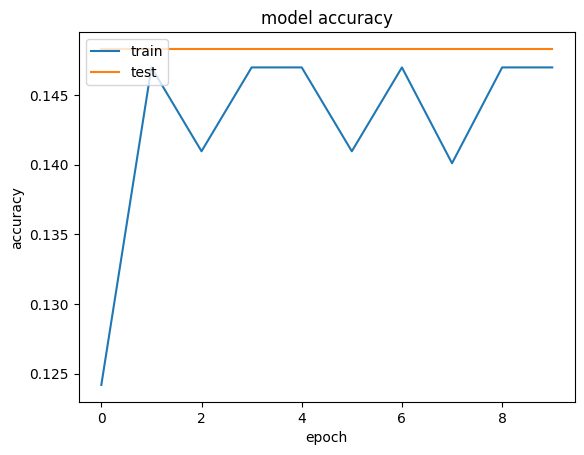

In [38]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- no change in model accuracy through epochs, we will try improving with early stops and dropout to fix any overfitting

In [39]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 5ms/step - loss: 2.4106 - accuracy: 0.1347


[2.410621404647827, 0.1347368359565735]

- Loss is still nan, extremely low accuracy in test set



### Model Building - Model 2

In [41]:
# Required imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Model
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(12, activation = "softmax"))

# Compilation
model2.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

# Training
history_model_ln2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.30, callbacks=[es, mc])


Epoch 1/10
65/73 [=========================>....] - ETA: 0s - loss: 2.4408 - accuracy: 0.1245
Epoch 1: val_accuracy improved from -inf to 0.14830, saving model to best_model.h5
73/73 [==============================] - 5s 17ms/step - loss: 2.4354 - accuracy: 0.1306 - val_loss: 2.3924 - val_accuracy: 0.1483
Epoch 2/10
20/73 [=======>......................] - ETA: 0s - loss: 2.3982 - accuracy: 0.1422

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/73 [==========================>...] - ETA: 0s - loss: 2.4122 - accuracy: 0.1368
Epoch 2: val_accuracy did not improve from 0.14830
73/73 [==============================] - 0s 6ms/step - loss: 2.4100 - accuracy: 0.1397 - val_loss: 2.3945 - val_accuracy: 0.1483
Epoch 3/10
71/73 [============================>.] - ETA: 0s - loss: 2.4068 - accuracy: 0.1479
Epoch 3: val_accuracy did not improve from 0.14830
73/73 [==============================] - 1s 7ms/step - loss: 2.4079 - accuracy: 0.1474 - val_loss: 2.4004 - val_accuracy: 0.1483
Epoch 4/10
71/73 [============================>.] - ETA: 0s - loss: 2.4065 - accuracy: 0.1466
Epoch 4: val_accuracy did not improve from 0.14830
73/73 [==============================] - 1s 9ms/step - loss: 2.4062 - accuracy: 0.1461 - val_loss: 2.3952 - val_accuracy: 0.1483
Epoch 5/10
70/73 [===========================>..] - ETA: 0s - loss: 2.4078 - accuracy: 0.1478
Epoch 5: val_accuracy did not improve from 0.14830
73/73 [==============================] - 1s 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


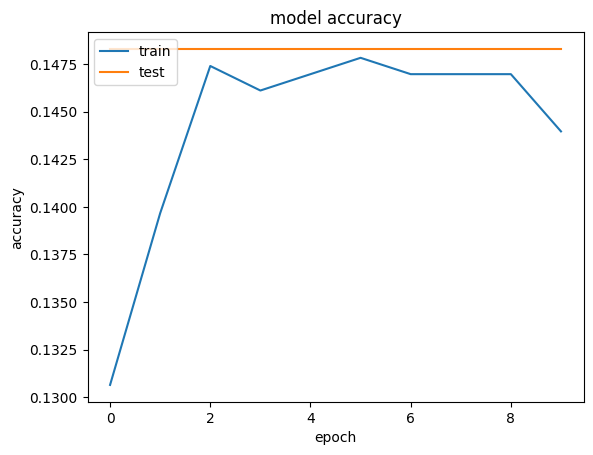

In [43]:
print(history_model_ln2.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln2.history['accuracy'])
plt.plot(history_model_ln2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- Model improved through first epoch then remained at a constant accuracy throughout the rest

In [45]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


RuntimeError: ignored

In [44]:
model2.evaluate(X_test,y_test)


RuntimeError: ignored

- loss no longer nan, almost double accuracy compared to the first model but still nan

In [46]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

1

removing some encoding to be able to use y test in prediction

In [49]:
y_test_pred_classes_ln1 = np.argmax(y_test_pred_ln1, axis=1)
rounded_labels = np.argmax(np.array(rounded_labels), axis=1)


AxisError: ignored

In [50]:
y_test_pred_classes_ln1 = np.argmax(y_test_pred_ln1, axis=1)
rounded_labels = np.argmax(np.array(rounded_labels), axis=1)


AxisError: ignored

In [51]:
# Test Prediction
y_test_pred_ln1 = model.predict(X_test)
y_test_pred_classes_ln1 = np.argmax(y_test_pred_ln1, axis=1)
y_test_pred_prob_ln1 = np.max(y_test_pred_ln1, axis=1)

45/45 [==============================] - 0s 2ms/step


In [52]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(np.array(rounded_labels), y_test_pred_classes_ln1)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 13.47%


In [53]:
pip install scikit-learn


In [54]:
accuracy_score(np.array(rounded_labels), y_test_pred_classes_ln1)


0.13473684210526315

In [56]:
cf_matrix = confusion_matrix(np.array(rounded_labels), y_test_pred_classes_ln1)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

NameError: ignored

In [59]:
from sklearn.metrics import precision_recall_fscore_support

p = precision_recall_fscore_support(np.array(rounded_labels), y_test_pred_classes_ln1, average=None, labels=list(np.unique(rounded_labels)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))



 Precision is [0.         0.         0.         0.         0.         0.
 0.13107822 0.         0.         0.         1.         0.        ]
 Recall is [0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.04166667 0.        ] 
 f_beta Score is [0.        0.        0.        0.        0.        0.        0.2317757
 0.        0.        0.        0.08      0.       ]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
p=precision_recall_fscore_support(np.array(rounded_labels), y_test_pred_classes_ln1, average=None,labels=list(np.unique(rounded_labels)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.         0.         0.         0.         0.         0.
 0.13107822 0.         0.         0.         1.         0.        ]
 Recall is [0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.04166667 0.        ] 
 f_beta Score is [0.        0.        0.        0.        0.        0.        0.2317757
 0.        0.        0.        0.08      0.       ]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Model only seemed to work with Loose Silky-bent. None of the other categories have accurate perdictions. Model is not working properly.

In [61]:
# Test Prediction
y_test_pred_ln2 = model2.predict(X_test)
y_test_pred_classes_ln2 = np.argmax(y_test_pred_ln2, axis=1)
y_test_pred_prob_ln2 = np.max(y_test_pred_ln2, axis=1)

45/45 [==============================] - 0s 2ms/step


In [63]:
print(np.array(rounded_labels).shape)
print(y_test_pred_classes_ln2.shape)


(1425,)
(1425, 26, 64)


In [64]:
print(np.unique(rounded_labels))
print(np.unique(y_test_pred_classes_ln2))


[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  5  6  7  9 10 11 12 15 16 17 18 19 20 21 22 23 24 25]


In [66]:
print(rounded_labels.shape)
print(rounded_labels[:10])


(1425,)
[0 1 4 6 5 8 4 4 7 6]


In [68]:
y_test_pred_classes_ln2 = np.argmax(y_test_pred_classes_ln2, axis=1)


In [69]:
rounded_labels = np.argmax(rounded_labels, axis=1)


AxisError: ignored

In [70]:
accuracy_score(rounded_labels, y_test_pred_classes_ln2)


ValueError: ignored

In [71]:
print(rounded_labels.shape)
print(y_test_pred_classes_ln2.shape)
print(rounded_labels[:10])
print(y_test_pred_classes_ln2[:10])



(1425,)
(1425, 64)
[0 1 4 6 5 8 4 4 7 6]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 

In [73]:
from sklearn.metrics import confusion_matrix


In [74]:
import seaborn as sns


In [76]:
rounded_labels_classes = np.argmax(rounded_labels, axis=1)


AxisError: ignored

In [77]:
cf_matrix = confusion_matrix(rounded_labels_classes, y_test_pred_classes_ln2)


NameError: ignored

In [75]:
cf_matrix = confusion_matrix(np.array(rounded_labels), y_test_pred_classes_ln2)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)


ValueError: ignored

In [78]:
p=precision_recall_fscore_support(np.array(rounded_labels), y_test_pred_classes_ln2, average=None,labels=list(np.unique(rounded_labels)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

ValueError: ignored

- Model only seemed to work with Sugar beet. None of the other categories have accurate perdictions. Model is not working properly. Accuracy is higher than model 1

### Conclusions

- Neither model worked properly. This may be due to errors in preprocessing the data or that the models do not mesh well with the data
- Models could be improved with more convolution and pool layers.
- Once a working model is applied more analysis can be done on raising recall and f1 scores of data, this was not explored here due to the models not working properly.

